In [1]:
#Importem les llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib, matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
#Llegim el fitxer csv on hi tenim els clusters corresponents a cada pacient
archivo = "C:/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/kmeans_labels.csv"
cluster_labels = pd.read_csv(archivo, index_col = 0)
cluster_labels 

,x
X00f54652.691e.4446.869a.4dd51c236f56,4
X017f7806.7804.43b9.8123.e1b48d2d6496,3
X02baceff.cbab.41cb.b801.be18ad6991b2,4
X036f7712.a636.4198.b568.6c85d9db4a3b,1
X0386037f.728c.47b0.93d0.6bb81b8b2a05,2
...,...
fdc7d01c.8737.4959.a13f.a6f85f037e65,3
feabad6d.2c34.4491.bfd3.afd36b1435fc,1
fecd3669.e812.49ce.8914.9d84ded36f35,2
ff101b50.3317.4296.a0bf.2316cb4b039a,3


In [3]:
# Llegim el fitxer csv on hi tenim pacients i gens
archiu = "C:/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/wdf.csv"
wdf = pd.read_csv(archiu, index_col=0)
wdf

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000211592.8,12.452363,11.475355,13.809233,15.278539,9.053309,5.315715,7.086541,6.147909,15.278539,14.112977,...,5.203891,15.278539,7.897460,10.107107,7.479887,9.538441,12.899550,8.221908,12.005598,12.207016
ENSG00000211896.7,11.584779,7.176898,12.005598,13.225937,7.340080,4.210884,3.935485,4.072637,13.948601,11.770833,...,3.423572,14.112977,6.424243,7.847400,5.028297,7.042324,11.703987,3.913244,10.626798,10.107107
ENSG00000239951.1,9.256775,7.433069,8.666235,9.972952,5.225552,3.397955,3.306240,2.769816,11.073748,9.938300,...,2.902968,11.297022,4.574358,4.873654,3.195021,5.182210,9.538441,5.290928,7.244777,7.386283
ENSG00000253755.1,7.502980,6.424243,7.623398,8.611407,5.290928,3.218022,2.280222,2.280222,11.337825,6.257272,...,1.918856,10.432136,4.394419,2.970638,3.037665,4.305823,8.910054,1.460409,7.897460,7.340080
ENSG00000211895.5,8.719594,10.594411,10.107107,10.881554,8.827717,4.940462,6.213904,3.889713,11.923654,9.346434,...,4.233082,11.703987,5.798305,7.479887,5.182210,8.693164,10.784256,7.623398,10.041264,10.004961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000233913.7,7.772924,1.855600,3.589267,1.692894,4.485730,6.600930,8.299735,7.479887,1.503855,1.307686,...,7.042324,0.492983,4.595265,1.710991,3.913244,3.195021,2.514830,6.319995,8.221908,4.960927
ENSG00000134184.13,3.681631,0.013576,4.711844,0.034561,0.228219,1.398196,4.485730,3.564781,1.918856,1.129623,...,4.439643,0.000863,6.709701,0.057135,0.324894,0.156480,0.057135,0.711861,1.569350,0.132877
ENSG00000196735.13,3.796913,5.994376,5.159739,4.551661,3.283745,4.666333,4.850172,4.350666,5.382314,2.835846,...,5.225552,4.895895,6.016282,4.732867,5.382314,5.579038,4.257163,5.972147,4.329187,5.994376


In [4]:
#Fem la transposada del dataframe wdf i passem els dos dataframes a array
wdf_transposed = wdf.transpose()
X = wdf_transposed.to_numpy()
y = cluster_labels.to_numpy()

In [5]:
#Dividim les dades en conjunts d'entrenament i prova, tenint una mostra de test del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Creació i entrenament del model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluació del model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Exactitud del modelo: {accuracy}')
print(f'Reporte de clasificación:\n{report}')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exactitud del modelo: 0.9423076923076923
Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.93      0.96      0.94        26
           3       0.86      0.95      0.90        19
           4       1.00      1.00      1.00        15
           5       0.96      0.88      0.92        26

    accuracy                           0.94       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.94      0.94      0.94       104



Text(0.5, 1.0, 'Random Forest Feature Importances')

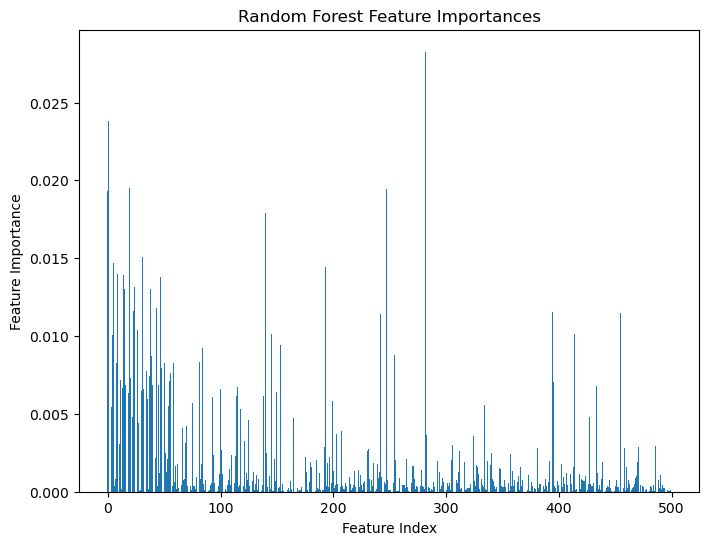

In [7]:
#Visualitzem el model en gràfica
feature_importances = model.feature_importances_
#Creem un bar chart per tal de visualitzar amb feature importances
matplotlib.pyplot.figure(figsize=(8, 6))
matplotlib.pyplot.bar(range(len(feature_importances)), feature_importances)
matplotlib.pyplot.xlabel('Feature Index')
matplotlib.pyplot.ylabel('Feature Importance')
matplotlib.pyplot.title('Random Forest Feature Importances')

In [8]:
#FUTURE IMPORTANCE
importances = model.feature_importances_

top_gene_indices = importances.argsort()[::-1][:10]

top_genes = wdf.index[top_gene_indices]

print("Top 10 genes:")
print(top_genes)

Top 10 genes:
Index(['ENSG00000113924.12', 'ENSG00000211896.7', 'ENSG00000211653.2',
       'ENSG00000243466.1', 'ENSG00000153446.16', 'ENSG00000211592.8',
       'ENSG00000198417.7', 'ENSG00000115414.21', 'ENSG00000211677.2',
       'ENSG00000154319.16'],
      dtype='object', name='gene_id')


Text(0.5, 1.0, 'Decision tree trained on all the thyroid cancer samples features')

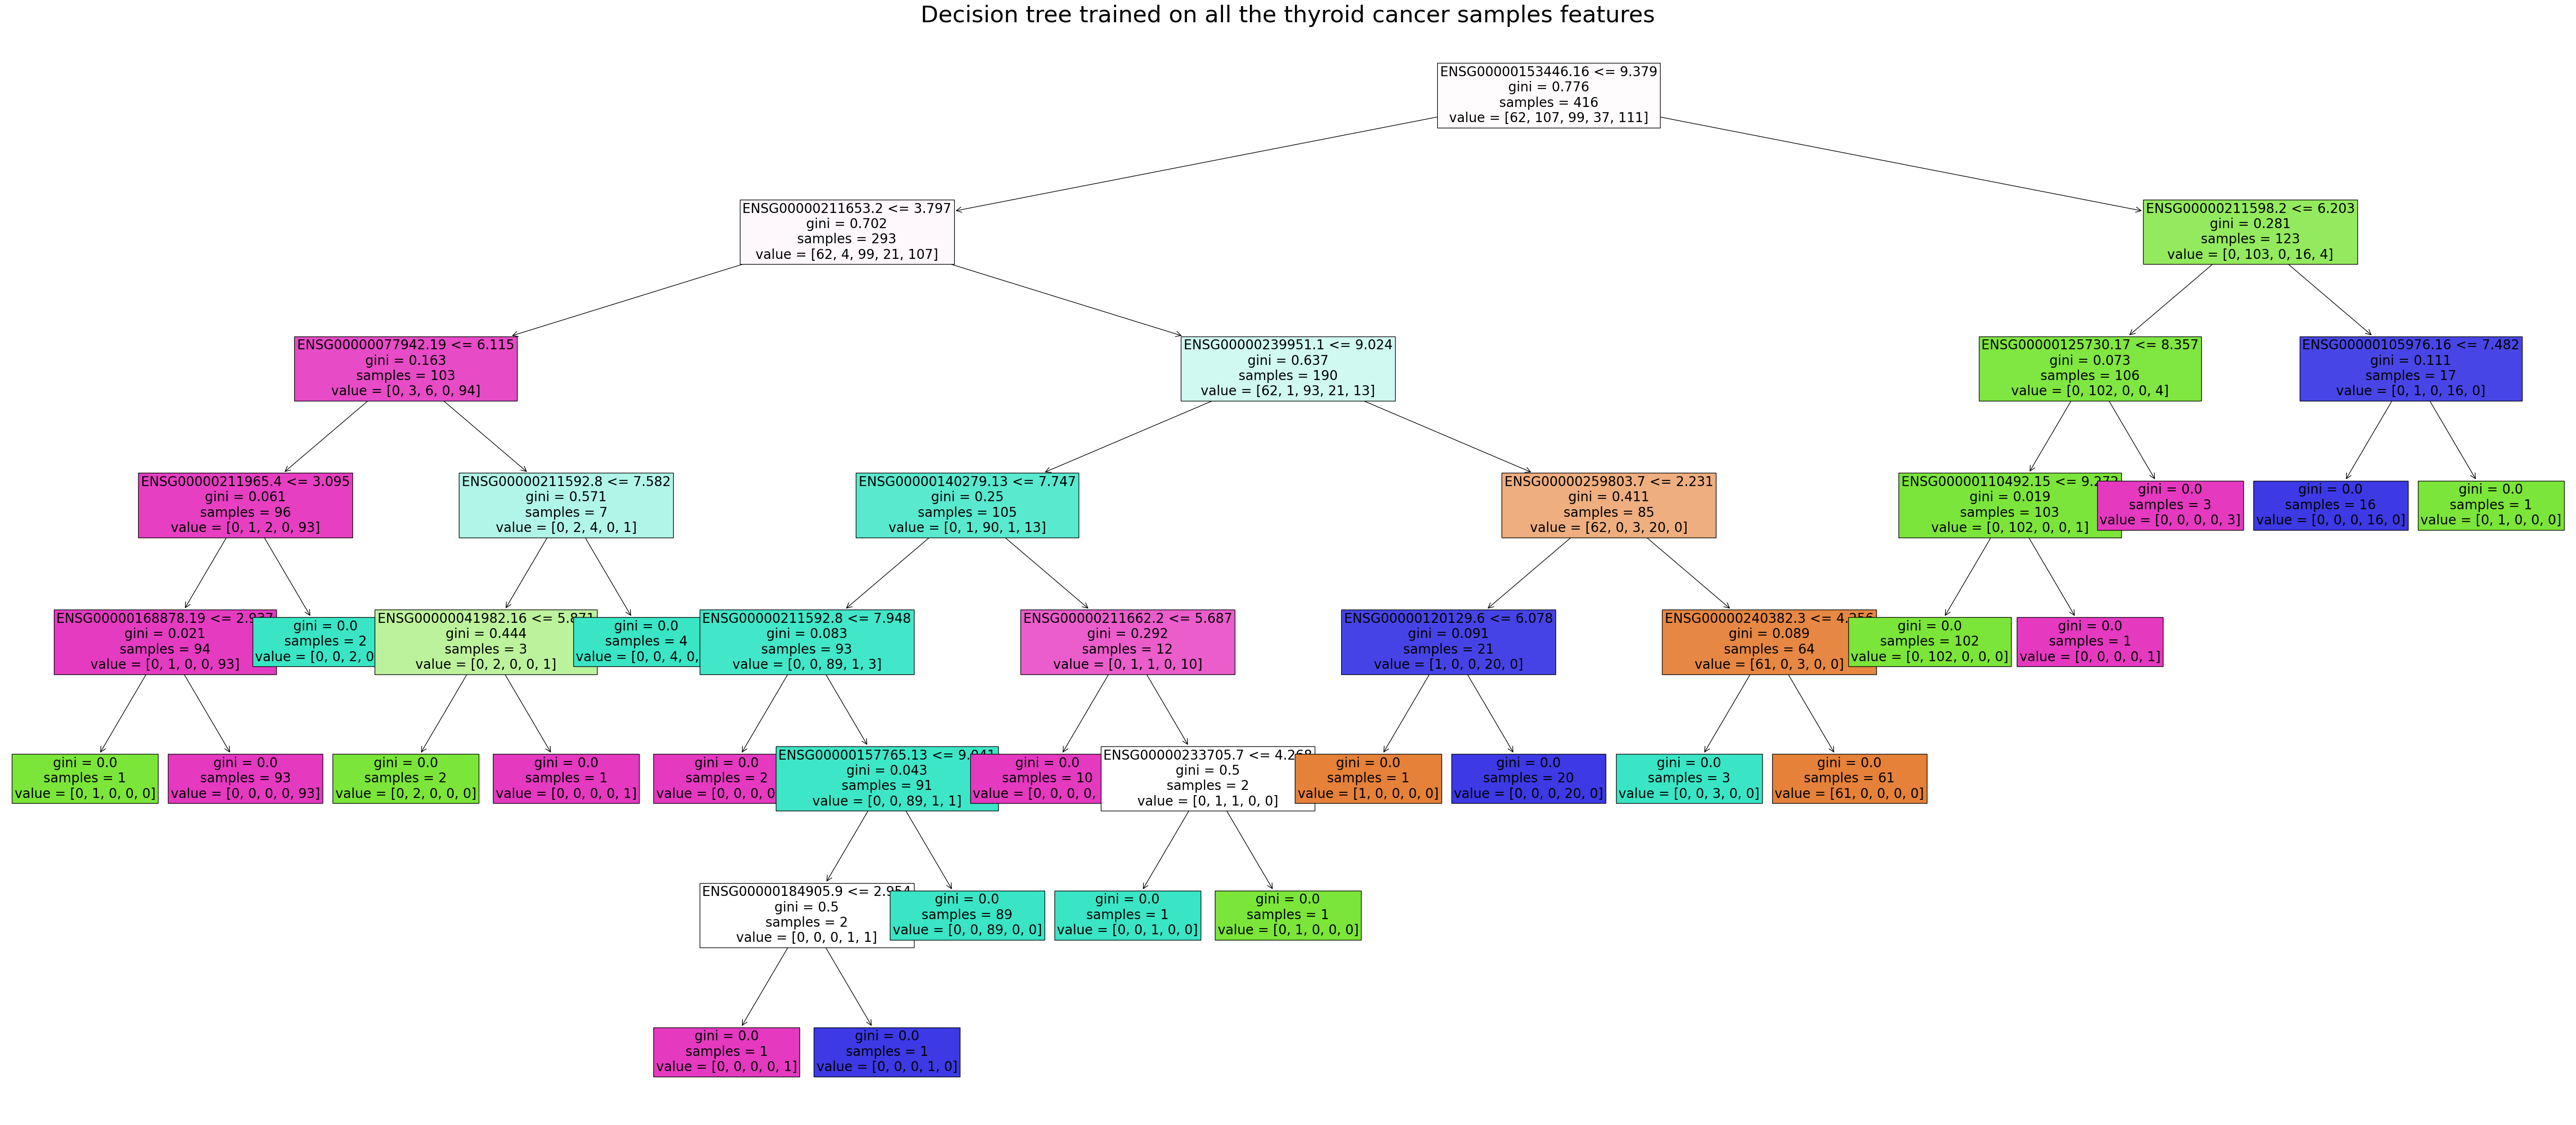

In [9]:
tree_classifier = DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(X_train, y_train)

gene_ids = wdf_transposed.columns.tolist()

plt.figure(figsize = (70, 30))
plot_tree(tree_classifier, filled = True, fontsize = 20, feature_names = gene_ids, class_names = None)
plt.title("Decision tree trained on all the thyroid cancer samples features", fontsize = 35)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 1.0, 'Decision tree trained on all the thyroid cancer samples features')

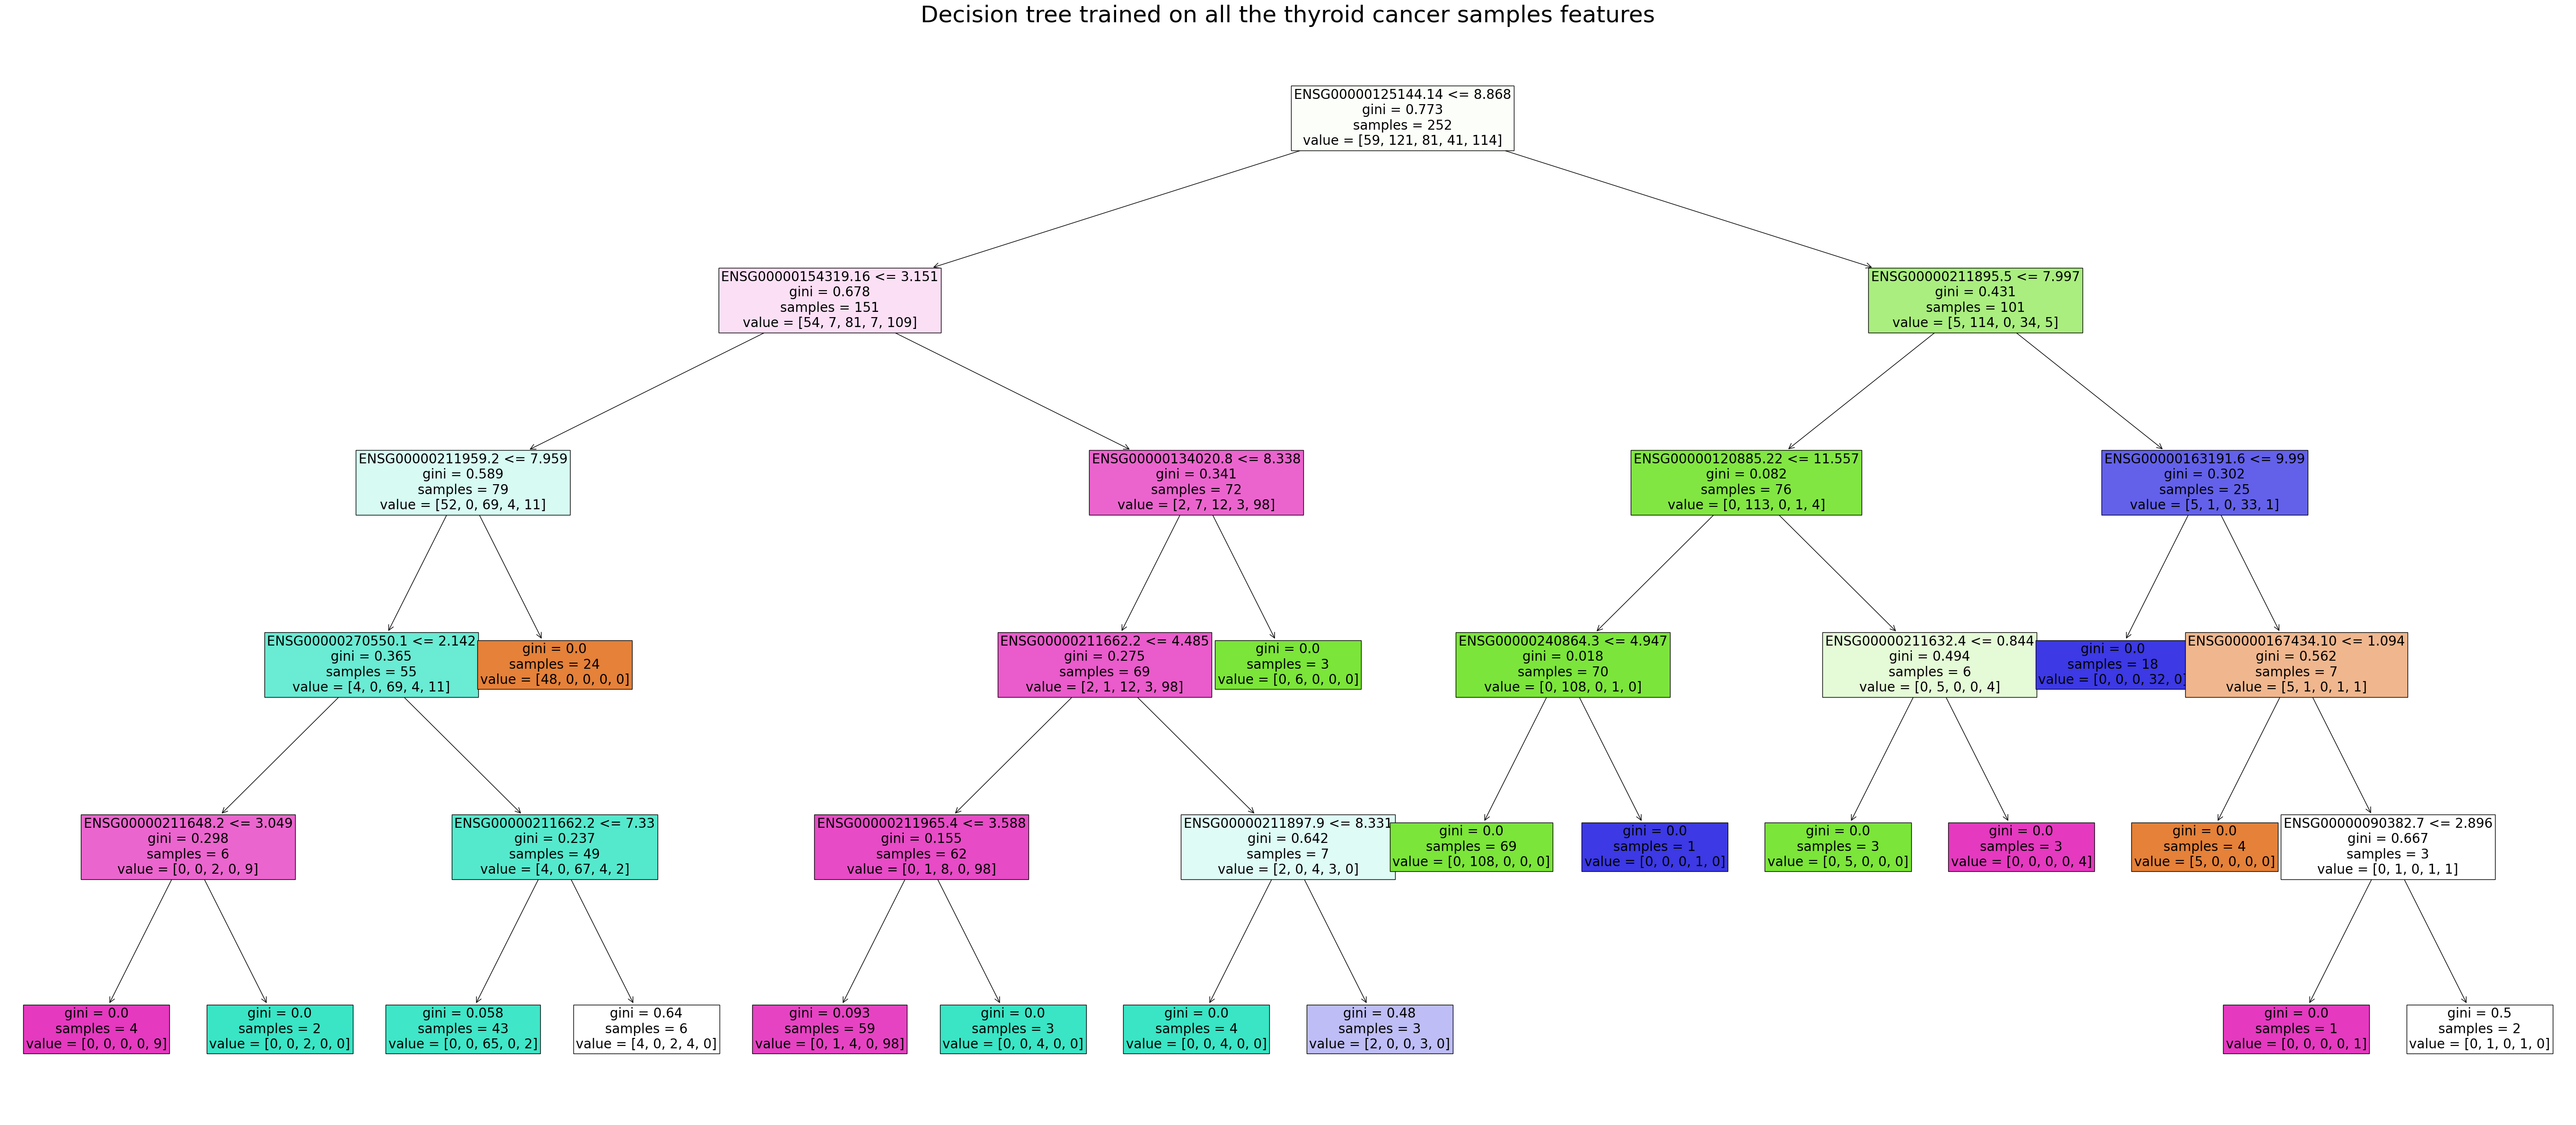

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener los árboles del bosque
trees = model.estimators_

# Generar un árbol
tree = trees[0]

gene_ids = wdf_transposed.columns.tolist()

plt.figure(figsize = (70, 30))
plot_tree(tree, filled = True, fontsize = 20, feature_names = gene_ids, class_names = None)
plt.title("Decision tree trained on all the thyroid cancer samples features", fontsize = 35)

In [11]:
#Carreguem llibreries necessàries per la ROC Curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
import sklearn, sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [12]:
#Valor AUC
roc_auc_score(y, model.predict_proba(X), multi_class='ovr') 

0.9997479467450102

In [13]:
#Probabilitats
y_pred = model.predict_proba(X_test)

In [15]:
#Transformem els clusters en 1 corresponent
label_binarizer = LabelBinarizer().fit(y_train) 
y_onehot_test = label_binarizer.transform(y_test) 
y_onehot_test.shape 

(104, 5)

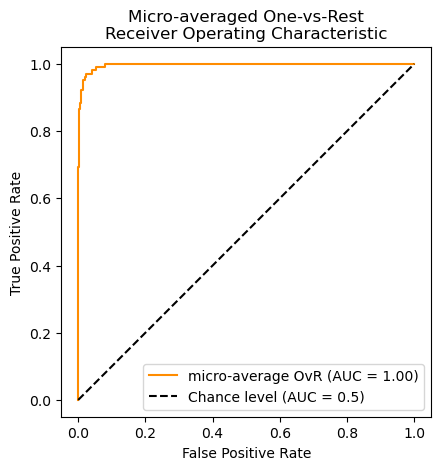

In [17]:
#Visualitzem ROC Curve a partir de la funció ROcCurveDisplay.form_predictions()
RocCurveDisplay.from_predictions( 
    y_onehot_test.ravel(), 
    y_pred.ravel(), 
    name="micro-average OvR", 
    color="darkorange", 
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()